# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [89]:
import pandas as pd
%matplotlib inline 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
df=pd.read_csv("C:/Somduity/Python/Residency 3/insurance.csv")

# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [90]:
df['charges'].describe()
#mean is 13270 but median is 9382, max is 63770 while 75 percentile data is at 16639, this huge difference could be coz of outliers
df.dtypes

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [91]:
df.groupby(['smoker','sex']).count()

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


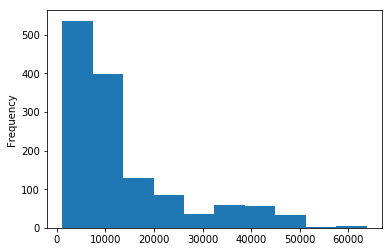

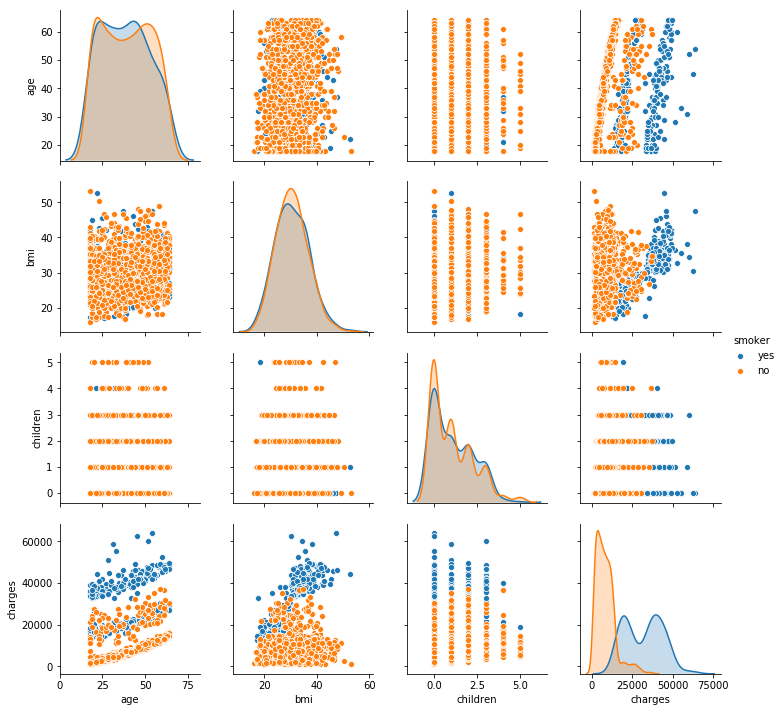

In [92]:
import matplotlib.pyplot as plt
df.charges.plot(kind='hist')
import seaborn as sns
sns.pairplot(diag_kind='kde',data=df,hue='smoker')

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [93]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [116]:
import numpy as np
df_features=df.drop(labels='charges',axis=1)
df_features.shape

df_label=df['charges']
df_label.shape


(1338, 6)

(1338,)

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.30)


# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [118]:
X_train_final=pd.get_dummies(X_train,prefix_sep='_')
#Dum_smoke=pd.get_dummies(X_train['smoker'],prefix='smoke_')
#Dum_region=pd.get_dummies(X_train['region'],prefix='region_')

#X_train_imp=X_train[['age','bmi','children']].join(Dum_sex).join(Dum_smoke).join(Dum_region)
X_train_final.shape

(936, 11)

In [119]:
X_test_final=pd.get_dummies(X_test,prefix_sep='_')
#Dum_smoke1=pd.get_dummies(X_test['smoker'],prefix='smoke_')
#Dum_region1=pd.get_dummies(X_test['region'],prefix='region_')

#X_test_imp=X_test[['age','bmi','children']].join(Dum_sex1).join(Dum_smoke1).join(Dum_region1)

X_test_final.shape

(402, 11)

# Question 6 - Train your model.

In [120]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_final,y_train_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [183]:
from sklearn import metrics
predict=model.predict(X_test_final)
X_train_final.columns
for idx, col_name in enumerate(X_train_final.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))
print(model.intercept_)
print(model.coef_)
metrics.r2_score(y_test_final,predict)



Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

The coefficient for age is 59.76779424127786
The coefficient for bmi is 6.252735972979146
The coefficient for children is 556.3903672332915
The coefficient for sex_female is -138.52509338465896
The coefficient for sex_male is 138.52509338465902
The coefficient for smoker_no is -361.797142551599
The coefficient for smoker_yes is 361.7971425515992
The coefficient for region_northeast is -322.42693561142806
The coefficient for region_northwest is -538.5152920353696
The coefficient for region_southeast is 114.97303995756832
The coefficient for region_southwest is 745.9691876892291
10213.549991241765
[  59.76779424    6.25273597  556.39036723 -138.52509338  138.52509338
 -361.79714255  361.79714255 -322.42693561 -538.51529204  114.97303996
  745.96918769]


-0.02188171704074149

# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [173]:
#predict
mae_sum = 0
for  a,x in zip(range(len(y_test_final)),range(len(X_test_final))):
    prediction=predict[x]
    print(prediction)
    mae_sum += abs(y_test_final[a] - prediction)
mae = mae_sum / len(y_test_final)
print("Mean absolute error=%.3f" %mae)

14583.123170196963
13459.712784576313
15471.763020323051
14978.614100057679
14578.094485833226
13195.767559371267
13670.878625176989
14694.202434932318
13249.177948754113
14930.695335495679
15143.7599997469
13048.741918613596
13598.819952410988
13189.259192280808
11116.25511611542
11967.290354887062
13078.97051278131
15063.3875806012
12400.624876214993
10902.865960678448
13978.402130862545
14933.104123517343
12943.92475482413
14310.727887465875
13873.238020875615
12888.205857723144
13629.839326334231
13987.734427247116
13902.350523099067
11116.211144955221
12223.618324458037
12724.926244165159
12354.408837691954
12688.15612734899
13364.095842870218
15009.235084006694
11952.542016728368
15487.396955694741
13778.661178924167
14527.713707942507
10673.930577221205
10451.080904286042
13107.26296363327
12643.664540094185
13445.89341707304
15750.260213783251
15775.662902659704
13574.229601514984
14964.143993678998
13832.37660212482
14749.62028510871
13109.582376390365
12905.458608823808
13089

In [164]:
metrics.mean_absolute_error(y_test_final,predict)

9173.484015603757

In [167]:
metrics.mean_squared_error(y_test_final,predict)
print("root mean sqaured error=" ,np.sqrt(metrics.mean_squared_error(y_test_final,predict)))

153619208.6557738

root mean sqaured error= 12394.321629511387


# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [214]:
from sklearn import datasets
df_iris=datasets.load_iris()
iris_data = pd.DataFrame(data=df_iris['data'],columns=df_iris['feature_names'])
iris_data["target"] = df_iris['target']
y=iris_data["target"]
X=iris_data.drop(labels="target",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


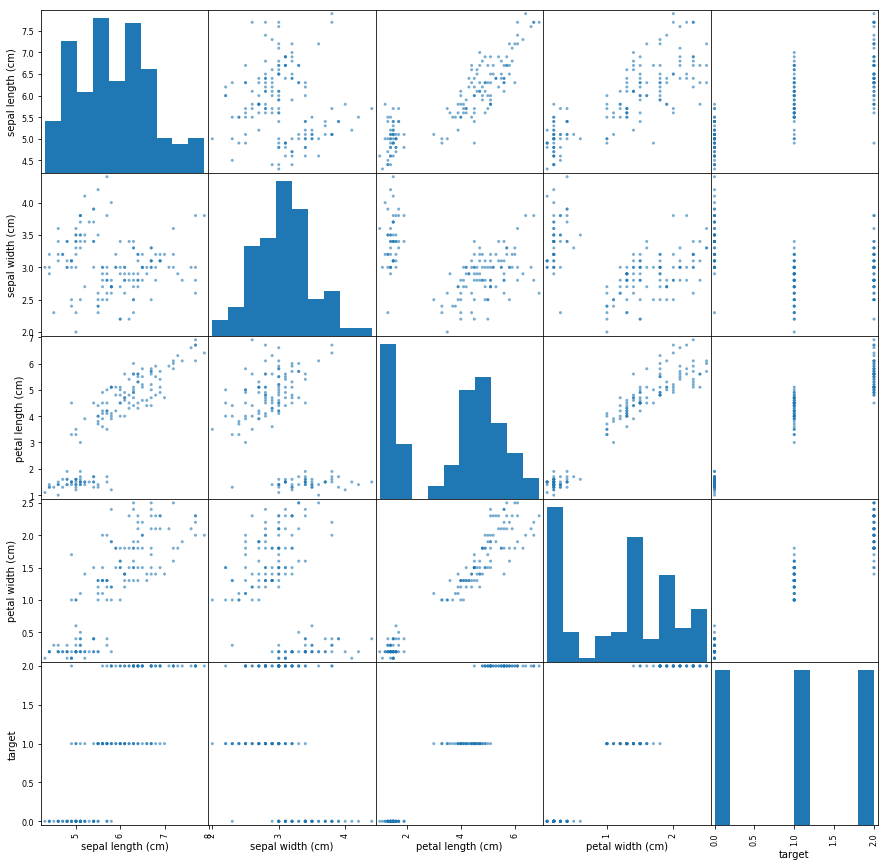

In [218]:
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(iris_data, alpha=0.6, figsize=(15, 15), diagonal='hist')

## Question 11- Do Feature Scaling 

In [222]:
from scipy.stats import zscore
X_train_z=X_train.apply(zscore)
X_test_z=X_test.apply(zscore)

## Question 12- Train and Fit NaiveBayes Model

In [225]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()
naive_model.fit(X_train,y_train)
y_pred=naive_model.predict(X_test)


GaussianNB(priors=None)

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [227]:
metrics.accuracy_score(y_pred,y_test)
metrics.confusion_matrix(y_pred,y_test)

0.8888888888888888

array([[10,  0,  0],
       [ 0, 17,  3],
       [ 0,  2, 13]], dtype=int64)

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [239]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=1)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
metrics.accuracy_score(y_pred_rf,y_test)
cr=metrics.classification_report(y_pred_rf,y_test)
print(cr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

0.9111111111111111

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.84      0.94      0.89        17
          2       0.94      0.83      0.88        18

avg / total       0.92      0.91      0.91        45



## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [232]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)

In [233]:
gbcl.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [240]:
predict_gbcl=gbcl.predict(X_test)
metrics.accuracy_score(predict_gbcl,y_test)
cr=metrics.classification_report(predict_gbcl,y_test)
print(cr)

0.9111111111111111

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.84      0.94      0.89        17
          2       0.94      0.83      0.88        18

avg / total       0.92      0.91      0.91        45

